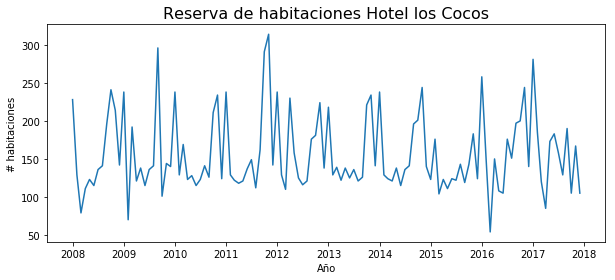

In [2]:
# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math
from matplotlib.pylab import rcParams
# data transforamtion and manipulation
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# plotting and plot styling
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"
# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_mode
# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss	

#serie de tiempo en grafico

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
data = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

#guardar en otra variable
ts = data['#guests']

#imprimir la serie de tiempo y guardarla en la carpeta imagen como referencia
plt.plot(data)
plt.title('Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel('# habitaciones')
plt.xlabel('Año')
plt.savefig('./img/serie_huespedes.png')
plt.show()

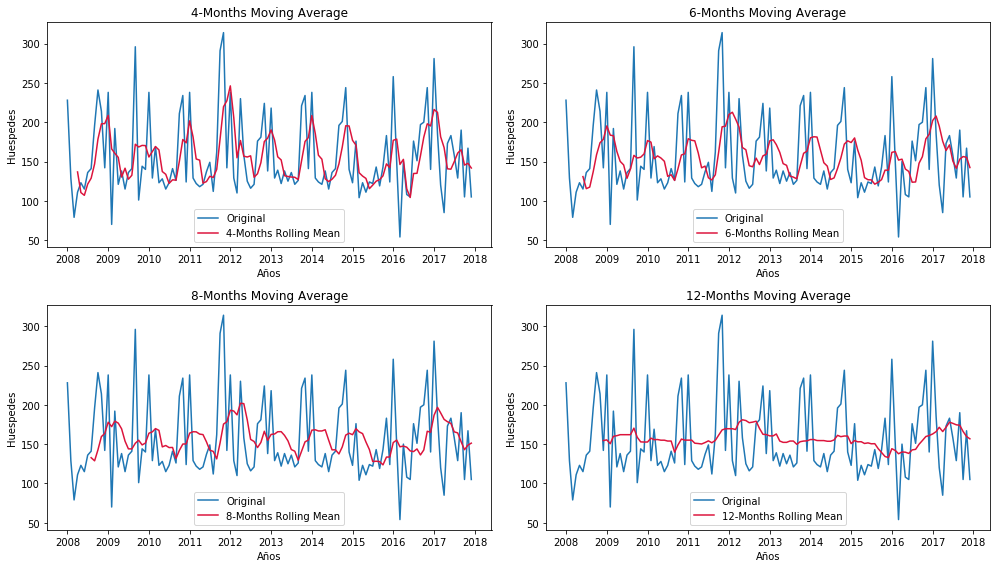

In [3]:

#analisis de tendencia
# definir figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);

# push data to each ax
#upper left
axes[0][0].plot(ts.index, ts, label='Original');
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Años");
axes[0][0].set_ylabel("Huespedes");
axes[0][0].set_title("4-Months Moving Average");
axes[0][0].legend(loc='best');

# upper right
axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Años");
axes[0][1].set_ylabel("Huespedes");
axes[0][1].set_title("6-Months Moving Average");
axes[0][1].legend(loc='best');

# lower left
axes[1][0].plot(ts.index, ts, label='Original');
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Años");
axes[1][0].set_ylabel("Huespedes");
axes[1][0].set_title("8-Months Moving Average");
axes[1][0].legend(loc='best');

# lower right
axes[1][1].plot(ts.index, ts, label='Original');
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Años");
axes[1][1].set_ylabel("Huespedes");
axes[1][1].set_title("12-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.savefig('./img/tendencia.png')
plt.show()

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
df = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year

# create nice axes names
month_names = pd.date_range(start='2008-01-01', periods=12, freq='MS').strftime('%b')

# reshape data using 'Year' as index and 'Month' as column
df_piv_line = df.pivot(index='Month', columns='Year', values='#guests')
df_piv_line = df_piv_line.reindex(index=month_names)
df_piv_line
